# Fitting GARCH(1,1) model to stock data of 3M corporation
First testing the Partial Autocorrelation to see whether GARCH is justfied for this dataset (it is) and then fitting a GARCH(1,1) to the data. 

### Import libraries and data

In [15]:
import csv
with open('garchdata.txt') as f:
    reader = csv.reader(f, delimiter=' ', skipinitialspace=True)
    first_row = next(reader)
    num_cols = len(first_row)
    records=[]
    for row in reader:
        records.append(row)

In [36]:
from functools import reduce
import operator
rec=reduce(operator.concat, records)
rec1=np.array(rec)
rec2=rec1.reshape(755,2)
garch=pd.DataFrame(rec2)
garch_1=pd.to_numeric(garch[1])

In [19]:
import os
import sys

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model
import matplotlib as mpl
%matplotlib inline
p = print

### Define function to graph time series

In [20]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

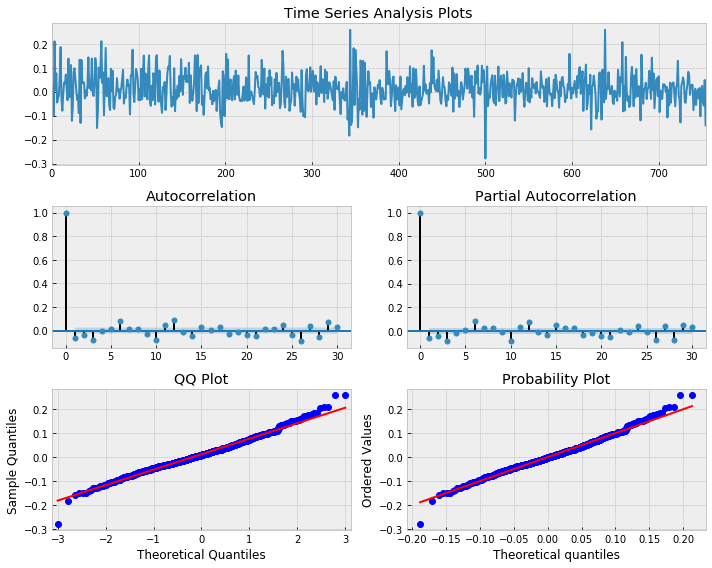

In [43]:
tsplot(garch_1, lags=30)

Plot shows that the time series exhibits some autocorrelation but seems otherwise close to white noise

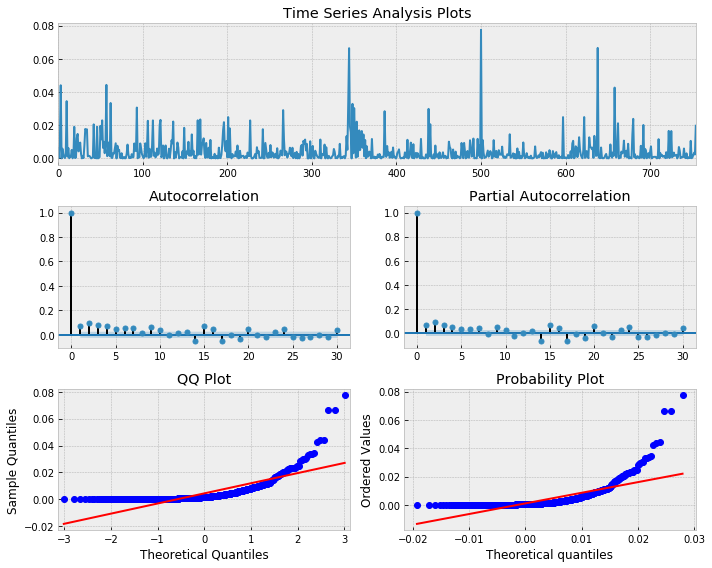

In [45]:
tsplot(garch_1**2, lags=30)

The squared return data shows that the PACF is sgnificant and, therefore,a GARCH model is appropiate here.

## GARCH model

In [44]:
am = arch_model(garch_1)
res = am.fit(update_freq=5)
p(res.summary())

Iteration:      5,   Func. Count:     41,   Neg. LLF: -1011.8806850581086
Iteration:     10,   Func. Count:     73,   Neg. LLF: -1011.9387226452473
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1011.9387226452235
            Iterations: 10
            Function evaluations: 73
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      1   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                1011.94
Distribution:                  Normal   AIC:                          -2015.88
Method:            Maximum Likelihood   BIC:                          -1997.37
                                        No. Observations:                  755
Date:                Thu, May 10 2018   Df Residuals:                      751
Time:   

The GARCH model summary shows that beta is sgnificant with a t-value of 9.221, justifying the use of the GARCH model.